## Preprocessed Data for Machine Learning (also see separate Data Cleaning file)

In [11]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../Resources/cleaned_credit_risk.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,2,5.0,1,1,1000,11.14,0,0.10,1,2
1,25,9600,0,1.0,3,2,5500,12.87,1,0.57,1,3
2,23,65500,1,4.0,3,2,35000,15.23,1,0.53,1,2
3,24,54400,1,8.0,3,2,35000,14.27,1,0.55,0,4
4,21,9900,2,2.0,5,0,2500,7.14,1,0.25,1,2


In [13]:
# Define y-axis by setting target column

target = df["loan_status"]
target_names = ["non default", "default"]

In [14]:
# Define x-axis by removing target column and keeping remaining columns as features

data = df.drop("loan_status", axis=1)
feature_names = data.columns
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,2,5.0,1,1,1000,11.14,0.10,1,2
1,25,9600,0,1.0,3,2,5500,12.87,0.57,1,3
2,23,65500,1,4.0,3,2,35000,15.23,0.53,1,2
3,24,54400,1,8.0,3,2,35000,14.27,0.55,0,4
4,21,9900,2,2.0,5,0,2500,7.14,0.25,1,2


In [15]:
print(data.shape, target.shape)

(28632, 11) (28632,)


# Split data into training and testing data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
7029,24,37200,1,8.0,1,0,7200,7.90,0.19,1,2
9445,23,34000,1,7.0,1,1,10000,10.36,0.29,1,4
2930,24,36000,0,3.0,4,1,4750,11.83,0.13,1,3
28116,36,38568,1,7.0,1,4,2400,18.39,0.06,0,13
23372,28,28896,1,6.0,4,2,15000,13.48,0.52,0,8


In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21474, 11) (7158, 11) (21474,) (7158,)


## Scaled or Normalized our data and used StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [19]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fit the Model to the scaled training data and made predictions using the scaled test data

k: 1, Train/Test Score: 1.000/0.849
k: 3, Train/Test Score: 0.928/0.878
k: 5, Train/Test Score: 0.912/0.885
k: 7, Train/Test Score: 0.905/0.887
k: 9, Train/Test Score: 0.900/0.887
k: 11, Train/Test Score: 0.897/0.888
k: 13, Train/Test Score: 0.895/0.886
k: 15, Train/Test Score: 0.894/0.886
k: 17, Train/Test Score: 0.892/0.886
k: 19, Train/Test Score: 0.890/0.885


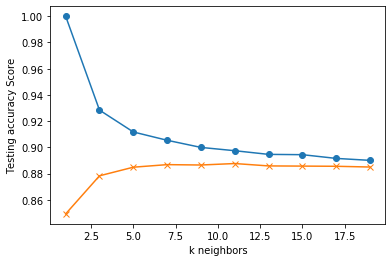

In [23]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [22]:
# Note that k: 13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.886
